In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing Dataset

In [3]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.shape

(200, 5)

There are 200 rows and 5 columns in dataset.

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

# Checking Null values 

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Checking Correlation

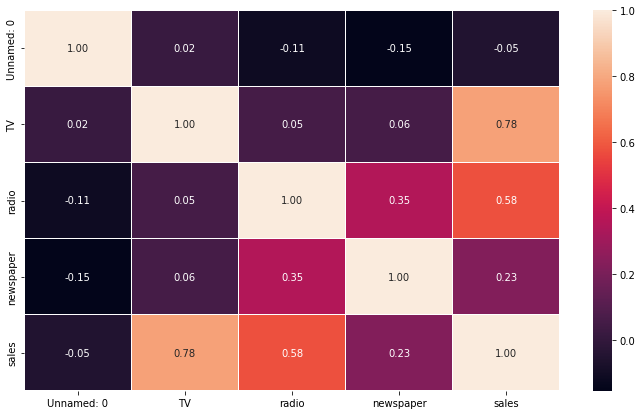

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="White",fmt=".2f")


- TV is 78 percent correlated with target column which is considered as a very strong +ve bond.
- Radio is 58 percent correlated with target column which is considered as a strong +ve bond.
- Newspaper is 23 percent correlated with target column which is considered as a good +ve bond.


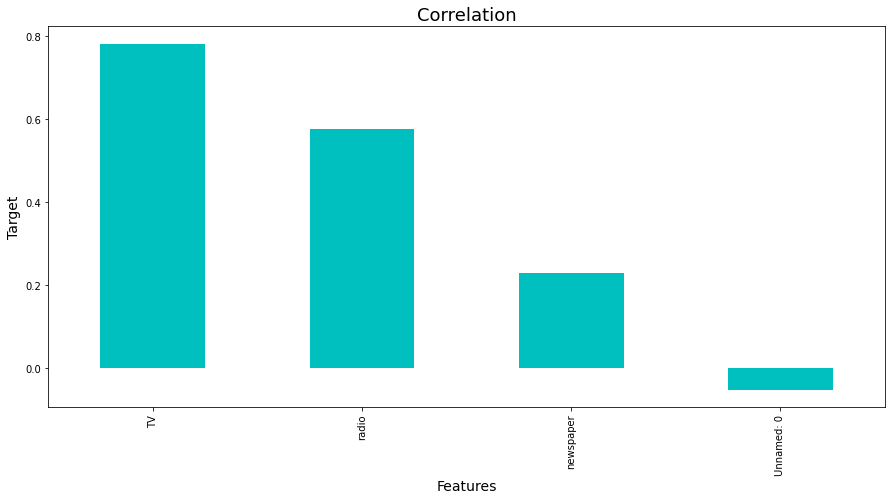

In [10]:
plt.figure(figsize=(15,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Max +ve correlation : TV
- Min +ve correlation : Newspaper

# Visualization

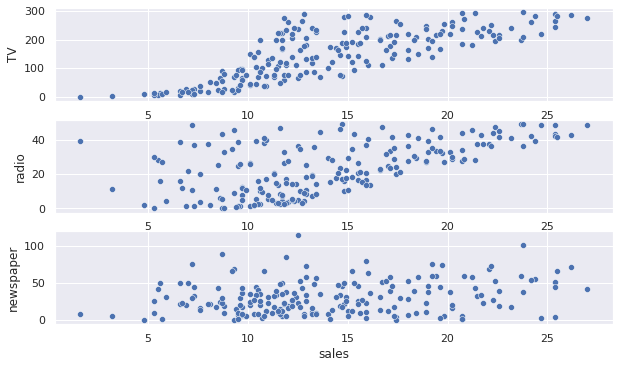

In [ ]:
import matplotlib.pyplot as plt
sns.set()
fig, axes = plt.subplots(3,figsize=(10, 5))
plt.subplots_adjust(bottom=0.001)
sns.scatterplot(y="TV",x="sales",data=df,ax=axes[0])

sns.scatterplot(y="radio",x="sales",data=df,ax=axes[1])

sns.scatterplot(y="newspaper",x="sales",data=df,ax=axes[2])


There is a non linear relationship between 
- sales and Tv
- sales and radio
- sales and newsapaper

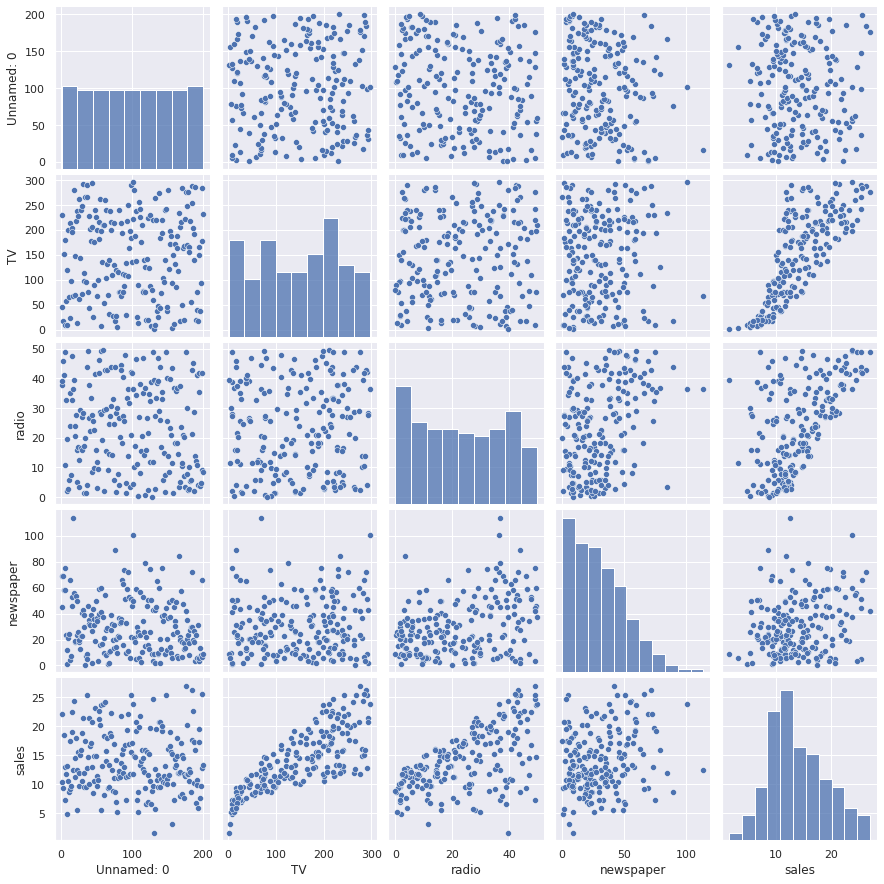

In [ ]:
sns.pairplot(df)

# Describing Data

In [ ]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


- Radio, newspaper and sales have mean>median, indicating the presence of right skewness
- Tv has mean<median, indicating the presence of left skewness.
- There is huge difference between 75% data and max, indicating presence of outlier in some of the features.

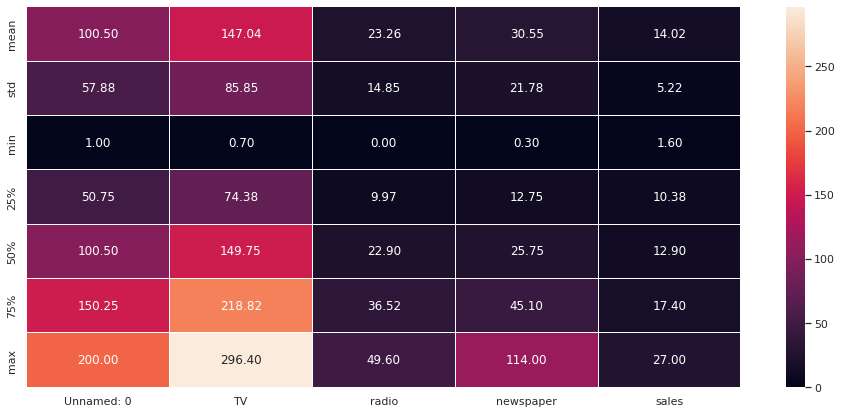

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
sns.heatmap(df.describe()[1:],annot=True,linewidths=0.1,linecolor="White",fmt=".2f")

TV	
- mean -		147.042500
-std	- 	85.854236	
-min	- 	0.700000	
-max -	296.400000

radio	
- mean -		23.264000	
-std - 14.846809
-min - 	0.000000
-max	-	49.600000	

newspaper	
- mean -		30.554000	
-std -	21.778621	
-min	- 0.300000	
-max	-	114.000000

sales
- mean -		14.022500
-std	- 5.217457
-min	- 	1.600000
-max	- 27.000000




# Checking Outliers

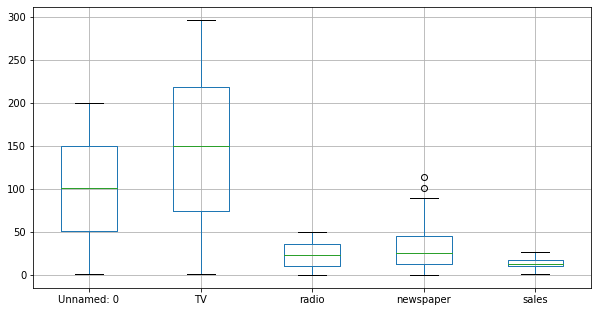

In [11]:
import matplotlib.pyplot as plt
df.iloc[:,0:6].boxplot(figsize=(10,5))
plt.subplots_adjust(bottom=0.1)
plt.show()

- Only newspaper has outlier.

In [12]:
new_df_cap = df.copy()

In [13]:
from scipy.stats import zscore
(np.abs(zscore(df))<3).all().all()

False

In [14]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101]), array([3, 3]))

In [15]:
new_df_cap=df[(z<3).all(axis=1)]

z=np.abs(zscore(new_df_cap))
threshold=3
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

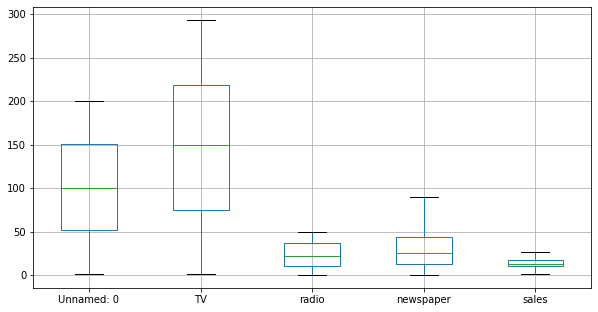

In [16]:
import matplotlib.pyplot as plt
new_df_cap.iloc[:,0:6].boxplot(figsize=(10,5))
plt.subplots_adjust(bottom=0.1)
plt.show()

# Separating feature and target data

In [17]:
x=new_df_cap.drop(["sales"],axis=1)
x.head()

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [18]:
y=new_df_cap["sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

# Detecting Skewness

In [19]:
x.skew().sort_values()

TV           -0.082332
Unnamed: 0   -0.006283
radio         0.114842
newspaper     0.650112
dtype: float64

In [20]:
from sklearn.preprocessing import power_transform

In [21]:
new=power_transform(x)

In [22]:
x=pd.DataFrame(new)

In [23]:
x.skew().sort_values()

1   -0.320682
0   -0.269331
2   -0.236668
3   -0.101288
dtype: float64

Text(0, 0.5, 'Newspaper')

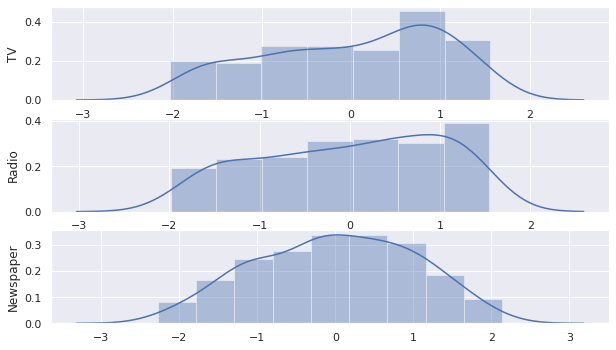

In [24]:
import matplotlib.pyplot as plt
sns.set()
fig, axes = plt.subplots(3,figsize=(10, 5))
plt.subplots_adjust(bottom=0.001)
sns.distplot(x.iloc[:,1:2],ax=axes[0])
axes[0].set_ylabel("TV")
sns.distplot(x.iloc[:,2:3],ax=axes[1])
axes[1].set_ylabel("Radio")
sns.distplot(x.iloc[:,3:4],ax=axes[2])
axes[2].set_ylabel("Newspaper")

# Detecting Collinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
calc_vif(x)

,variables,VIF
0,0,1.023891
1,1,1.003097
2,2,1.094450
3,3,1.101075


There is no collinearity.

# Traning and Testing

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


mns=MinMaxScaler()
s=mns.fit_transform(x)
x=pd.DataFrame(data=s)
print(x)

            0         1         2         3
0    0.000000  0.831842  0.836100  0.878788
1    0.012564  0.234098  0.857929  0.703678
2    0.024000  0.107725  0.950405  0.879435
3    0.034665  0.605586  0.886543  0.806215
4    0.044753  0.692832  0.353772  0.805502
..        ...       ...       ...       ...
193  0.985020  0.207298  0.158787  0.359758
194  0.988773  0.420665  0.197350  0.255878
195  0.992520  0.681736  0.317701  0.217749
196  0.996263  0.974197  0.896431  0.859129
197  1.000000  0.837308  0.300163  0.268336

[198 rows x 4 columns]


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr=LinearRegression()

In [29]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, training accuracy: {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, testing accuracy: {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, training accuracy: 0.9013624575456813
At random state 0, testing accuracy: 0.9146519827987244


At random state 1, training accuracy: 0.9077514360485811
At random state 1, testing accuracy: 0.8883139576066579


At random state 2, training accuracy: 0.9147899503637928
At random state 2, testing accuracy: 0.867081775664214


At random state 3, training accuracy: 0.9040831806758858
At random state 3, testing accuracy: 0.907540483467913


At random state 4, training accuracy: 0.9080633872155587
At random state 4, testing accuracy: 0.8798606489629511


At random state 5, training accuracy: 0.904512569921594
At random state 5, testing accuracy: 0.893783017401743


At random state 6, training accuracy: 0.9072878883730298
At random state 6, testing accuracy: 0.8912767186695632


At random state 7, training accuracy: 0.9036990998054495
At random state 7, testing accuracy: 0.906272766030531


At random state 8, training accuracy: 0.9088081404140247
At random state 8, testing a

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_test))
print("Mean Sq. Error ",mean_squared_error(y_test,pred_test))
print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_test)))

Mean Absolute Error  1.242289783884053
Mean Sq. Error  2.7581942076720454
Root Mean Sq  1.6607812040338261


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=955)

In [32]:
lr.fit(x_train,y_train) 
pred_train=lr.predict(x_train)

In [33]:
print(r2_score(y_test,pred_test))

-0.8124717759753901


# Cross validation

In [34]:
train_ac=r2_score(y_train,pred_train)
test_ac=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cv= {j} cv score is {cv_mean} and accuracy for training is {train_ac} and testing is {train_ac}")
    print("\n")

At cv= 2 cv score is 0.8822554688777035 and accuracy for training is 0.9005410783896767 and testing is 0.9005410783896767


At cv= 3 cv score is 0.8967803175870005 and accuracy for training is 0.9005410783896767 and testing is 0.9005410783896767


At cv= 4 cv score is 0.892638334216762 and accuracy for training is 0.9005410783896767 and testing is 0.9005410783896767


At cv= 5 cv score is 0.8934477544725891 and accuracy for training is 0.9005410783896767 and testing is 0.9005410783896767


At cv= 6 cv score is 0.8958573772376907 and accuracy for training is 0.9005410783896767 and testing is 0.9005410783896767


At cv= 7 cv score is 0.8912474492966211 and accuracy for training is 0.9005410783896767 and testing is 0.9005410783896767


At cv= 8 cv score is 0.8956422782886657 and accuracy for training is 0.9005410783896767 and testing is 0.9005410783896767


At cv= 9 cv score is 0.8916056030041695 and accuracy for training is 0.9005410783896767 and testing is 0.9005410783896767


At cv= 10

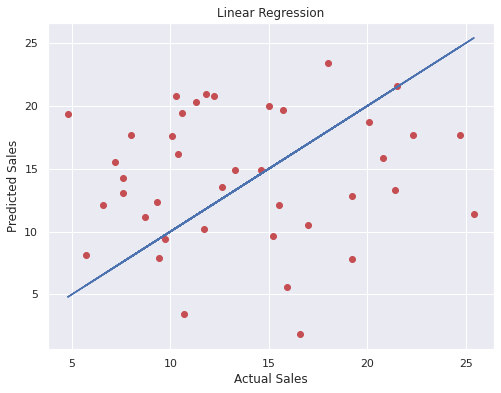

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression")
plt.show()

# Regularization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],
            'random_state': list(range(0,10)),
            'selection':['cyclic', 'random'],
            'fit_intercept': ['True','False']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'fit_intercept': 'True', 'random_state': 4, 'selection': 'random'}


In [ ]:
ls=Lasso(alpha=0.01,random_state=4,fit_intercept=True,selection='random')
ls.fit(x_train,y_train)
ls_score_train=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_train*100

89.83095951439213

In [ ]:
lss=r2_score(y_test,pred_ls)
lss*100

92.11322162133291

In [ ]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

89.48403627954029

# Ensemble Methods

# RandomForestRegressor

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter={'criterion':['mse','mae'],
          'max_features' : ["auto","sqrt","log2"],
           'n_estimators':range(0,100,10),
           'min_samples_split':range(0,10)}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 70}


In [38]:
rf=RandomForestRegressor(criterion='mae',max_features="auto",min_samples_split= 4, n_estimators=70)
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


Training r2 99.56046628597156
R2 Score: 97.73882871893247
Cross Val Score: 97.33254762902949


# AdaBoostRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

parameter={'loss':['linear', 'square', 'exponential'],
          'random_state' : range(0,100,10),
           'learning_rate':[0,1.0,2.0],
           'n_estimators':range(0,100,10)}

rf2=AdaBoostRegressor()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 80, 'random_state': 0}


In [ ]:
rf2=AdaBoostRegressor(learning_rate= 1.0, loss= 'linear', n_estimators= 80, random_state= 0)
rf2.fit(x_train,y_train)
train_r2=rf2.score(x_train,y_train)
pred_decision=rf2.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf2,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 97.62545298048904
R2 Score: 97.77484300915656
Cross Val Score: 95.84880525662669


# GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameter={'loss':['squared_error', 'absolute_error', 'huber','quantile'],
          'criterion':['friedman_mse', 'squared_error', 'mse'],
           'learning_rate':[0,1.0,2.0],
           'n_estimators':range(0,100,10)}

rf3=GradientBoostingRegressor()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'squared_error', 'learning_rate': 1.0, 'loss': 'huber', 'n_estimators': 10}


In [ ]:
rf3=GradientBoostingRegressor(learning_rate= 1.0, loss= 'huber', n_estimators= 10, criterion= 'squared_error')
rf3.fit(x_train,y_train)
train_r2=rf3.score(x_train,y_train)
pred_decision=rf3.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf3,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 98.93781983333972
R2 Score: 90.81972929396419
Cross Val Score: 88.75030648083786


# BaggingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

parameter={'oob_score':['True','False'],
          'n_jobs':range(0,10),
           'random_state':range(0,100,10),
           'n_estimators':range(10,100,10)}

rf4=BaggingRegressor()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 30, 'n_jobs': 7, 'oob_score': 'True', 'random_state': 10}


In [ ]:
rf4=BaggingRegressor(oob_score= True, n_jobs= 7, n_estimators= 30, random_state= 10)
rf4.fit(x_train,y_train)
train_r2=rf4.score(x_train,y_train)
pred_decision=rf4.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf4,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 99.62208460810945
R2 Score: 97.34896812801988
Cross Val Score: 97.26171908494547


# VotingRegressor

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

estimators = [ ('knc', KNeighborsRegressor()), ('svr',SVR()) ]
parameter={
          'n_jobs':range(0,10),
           'verbose':[True,False]
          }

rf5=VotingRegressor(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
{'n_jobs': 1, 'verbose': True}


In [48]:
rf5=VotingRegressor(estimators, n_jobs= 1, verbose= True)
rf5.fit(x_train,y_train)
train_r2=rf5.score(x_train,y_train)
pred_decision=rf5.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf5,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
Training r2 93.14996160815275
R2 Score: 92.09870279007907
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   0.0s
Cross Val Score: 88.31569073655359


# Model Saving

In [39]:
import pickle
filename='rf.pk1'
pickle.dump(rf,open(filename,'wb'))

# Loading Model

In [42]:
loaded_model=pickle.load(open('rf.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Accuracy:",result*100)

Model Accuracy: 97.73882871893247


# Testing Loaded Model

In [41]:
conc=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conc

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,10.660714,24.874286,15.504286,10.806429,19.818571,19.467143,16.919286,6.879286,17.423571,19.975,...,7.991429,16.616429,6.862143,10.546429,8.580714,13.03,19.433571,4.895714,11.652143,17.372143
Original,10.660714,24.874286,15.504286,10.806429,19.818571,19.467143,16.919286,6.879286,17.423571,19.975,...,7.991429,16.616429,6.862143,10.546429,8.580714,13.03,19.433571,4.895714,11.652143,17.372143
